<a href="https://colab.research.google.com/github/NastiiaKoval/Machine-Learning/blob/main/%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D1%8C_%D0%BF%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 5: Метод ліктя. Кластирезація даних. Випадковий ліс

## Завдання 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Завантаження датасету Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Виведення перших 5 рядків
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

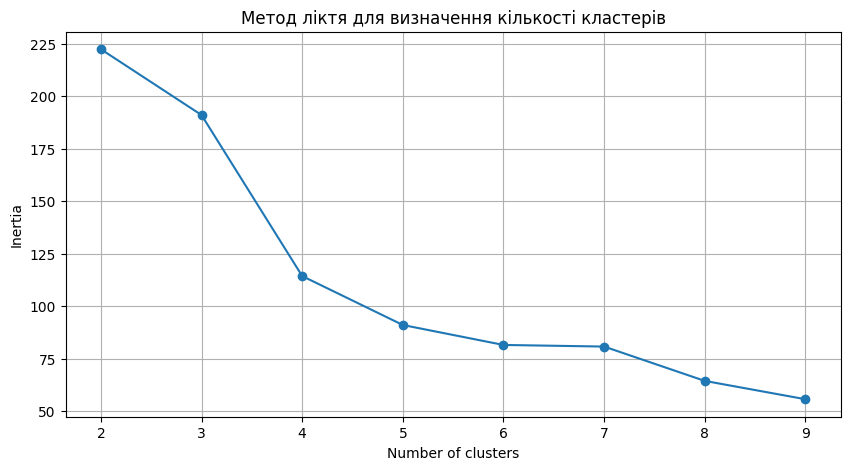

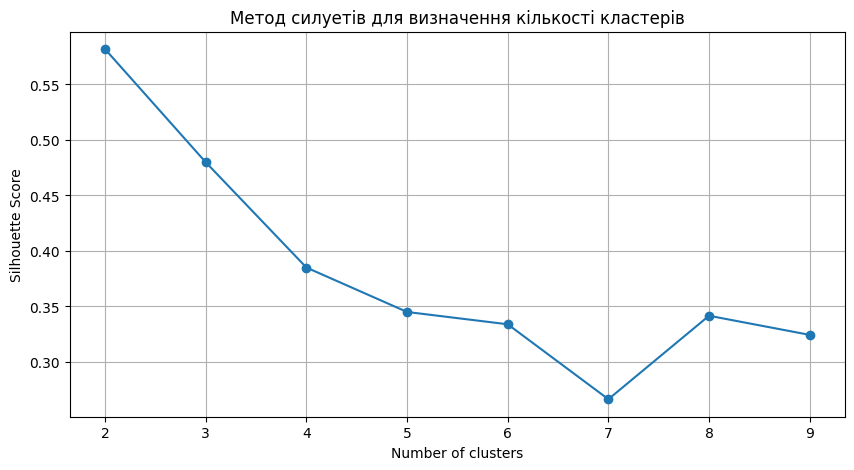

In [ ]:
# Метод ліктя
inertia = []
K = range(2, 10)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Метод ліктя для визначення кількості кластерів
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.grid(True)
plt.show()

# Метод силуетів
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.grid(True)
plt.show()

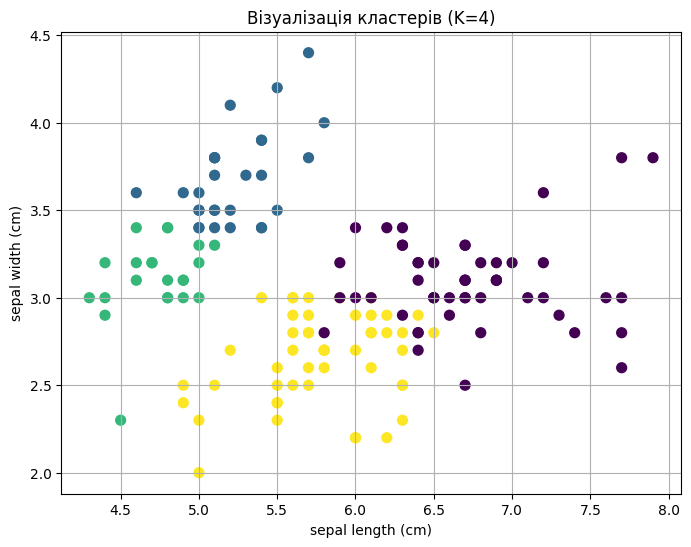

In [ ]:
# Кластеризація з оптимальною кількістю кластерів (K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів для K=4
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.title(f'Візуалізація кластерів (K={optimal_k})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.show()

### Висновки
Оптимальною кількістю кластерів є K=4, хоча в реальній структурі даних Iris маємо 3 групи. Розглянемо ще візуалізацію для трьох кластерів

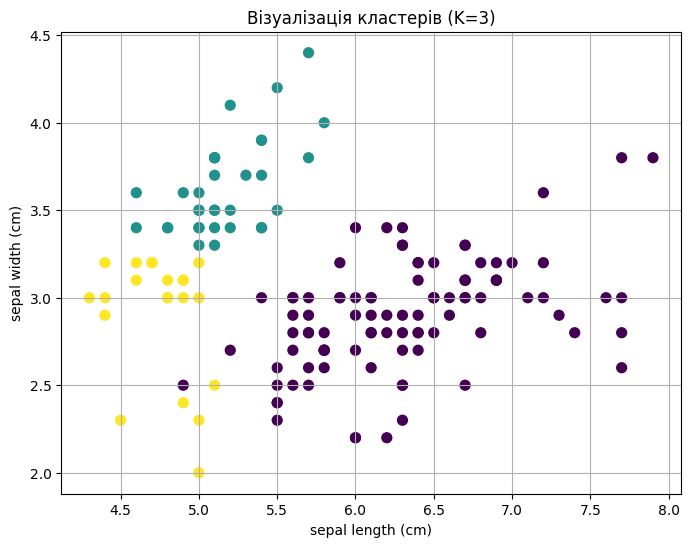

In [ ]:
# Кластеризація з оптимальною кількістю кластерів (K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів для K=3
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.title(f'Візуалізація кластерів (K={optimal_k})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.show()

## Завдання 2

### Огляд даних

In [ ]:
# Завантажимо та переглянемо новий файл Student_data.csv
file_path = 'Student_data.csv'
student_df = pd.read_csv(file_path)

# Виведемо перші кілька рядків, щоб зрозуміти структуру даних
student_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
student_df.isna().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
student_df.duplicated().sum()

0

In [ ]:
student_df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
student_df.nunique()

,0
StudentID,2392
Age,4
Gender,2
Ethnicity,4
ParentalEducation,5
StudyTimeWeekly,2392
Absences,30
Tutoring,2
ParentalSupport,5
Extracurricular,2


### Постановка задачі

Маємо цільову змінну: Grade Class

GradeClass: Класифікація оцінок студентів на основі середнього балу:

0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

Тобто маємо задачу класифікації, де найважливішою ознакою буде GPA -  середній бал за шкалою від 2,0 до 4,0, на який впливають навчальні звички, участь батьків та позакласні заходи.

In [ ]:
# Переглянемо розподіл даних в нашій цільовій змінній
student_df.GradeClass.value_counts(normalize=True)

,proportion
GradeClass,
4.0,0.506271
3.0,0.173077
2.0,0.163462
1.0,0.112458
0.0,0.044732


Бачимо, що дані не збалансовані. Найчастіше зустрічається клас 4 - 50% даних.

Доцільно перевести усі стовпці, окрім StudyTimeWeekly, GPA, Absences в категоріальний тип даних. А стовпець StudentID видалити

In [ ]:
student_df.drop(['StudentID'], axis=1, inplace = True)

In [ ]:
student_df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Дослідницький аналіз даних та візуалізація

In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
corr = student_df.corr()

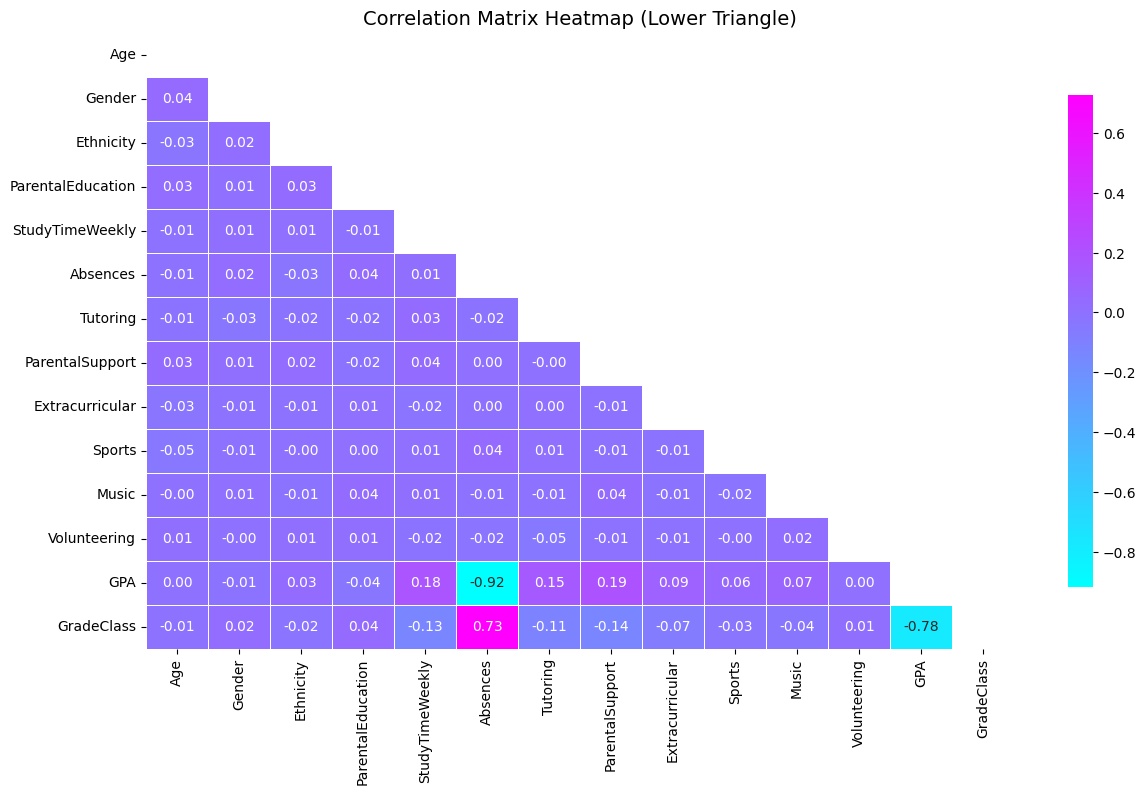

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='cool', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix Heatmap (Lower Triangle)', fontsize=14)
plt.show()

Подивимось на окремі зв'язки ствопців з сильною кореляцією

In [ ]:
px.scatter(student_df,
             x='GPA',
             title='GPA vs. GradeClass',
             color='GradeClass')

Бачимо чіткий розподіл на класи оцінок відносно середньої оцінки:

0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

Але є також певні виключення або викиди в даних

In [ ]:
px.box(student_df,
             x='Absences',
             title='Absences vs. GradeClass',
             color='GradeClass')

Бачимо розподіл на класи оцінок відносно кількості пропусків протягом навчального року:

0: 'A' (mean Absenses - 2)

1: 'B' (mean Absenses - 4)

2: 'C' (mean Absenses - 7 )

3: 'D' (mean Absenses - 11)

4: 'F' (mean Absenses - 21)

In [ ]:
px.box(student_df,
             x='StudyTimeWeekly',
             title='StudyTimeWeekly vs. GradeClass',
             color='GradeClass')

Бачимо також розподіл, що найбільше годин навчання на тиждень в класі 0, а найменше в класі 4

In [ ]:
px.histogram(student_df,
             x='ParentalSupport',
            #  y='ParentalEducation',
             title='Parents vs. GradeClass',
             color='GradeClass')

Найчастіше батьки підтримують на помірному рівні (2) дітей. Й на цьому рівні діти найчастіше мають клас 4 - як і в усіх інших рівнях підтримки батьків, що підтверджує, що даний клас найчасітше зустрічається в даних.


Розподіл на тренувальну, валідаційну та тестову вибірку

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(student_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
input_cols = list(student_df.columns)[1:-1]
target_col = 'GradeClass'

Тепер ми можемо створити вхідні дані та цільові значення для навчальних, валідаційних та тестових наборів для подальшої обробки та навчання моделі.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

### Навчання моделі

Спочатку натренуємо модель KNN та візуалізуємо метод ліктя та кластери

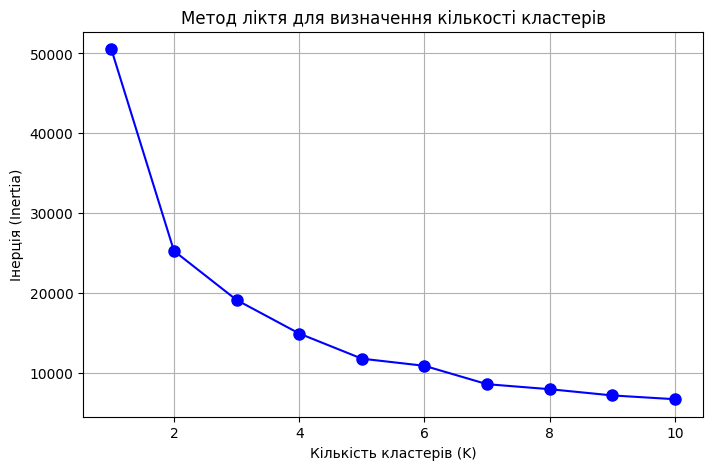

In [ ]:
# Метод ліктя для визначення оптимальної кількості кластерів
inertia = []  # Список для збереження інерції (inertia) для різних значень k
K = range(1, 11)  # Діапазон кількості кластерів, які перевіряємо

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(test_inputs)
    inertia.append(kmeans.inertia_)  # Додаємо значення інерції для кожного k

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('Інерція (Inertia)')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.grid(True)
plt.show()

Далі для візуалізації візьмемо найбільш корелюючі ознаки - GPA, Absences

In [117]:
input_cols

['Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GPA']

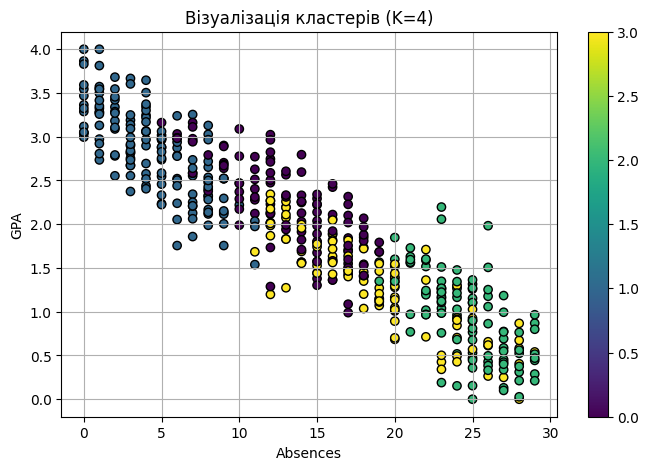

In [116]:
# Проведемо кластеризацію для оптимальної кількості кластерів (наприклад, K = 3)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(test_inputs)

# Додаємо стовпець з кластерами до наших даних
test_inputs_df = pd.DataFrame(test_inputs, columns=input_cols)
test_inputs_df['Cluster'] = clusters

# Візуалізація кластерів (2D)
plt.figure(figsize=(8, 5))
plt.scatter(test_inputs_df[input_cols[4]], test_inputs_df[input_cols[-1]], c=test_inputs_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel(input_cols[4])
plt.ylabel(input_cols[-1])
plt.title(f'Візуалізація кластерів (K={optimal_k})')
plt.colorbar()
plt.grid(True)
plt.show()


Далі натренуємо ще інші моделі, щоб обрати найліпшу

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
for name, clf in classifiers.items():
    clf.fit(train_inputs, train_targets)
    y_pred = clf.predict(val_inputs)
    accuracy = accuracy_score(val_targets, y_pred)
    print(f'{name}: {accuracy:.2f}')
    print('**'*10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression: 0.74
********************
Decision Tree: 0.85
********************
Random Forest: 0.92
********************
KNN: 0.70
********************


Бачимо, що на простих моделях найкращу оцінку має Random Forest. Продовжимо роботу з ним.

In [ ]:
# Створення базової моделі
base_model = RandomForestClassifier(random_state=1, n_jobs=-1).fit(train_inputs, train_targets)

In [ ]:
base_train_acc = base_model.score(train_inputs, train_targets)
base_val_acc = base_model.score(val_inputs, val_targets)

In [ ]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.918580375782881)

Модель перенавчається, оскільки на тренувальному наборі даних маємо score - 1

Спробуємо зменшити перенавчання шляхом налаштування гіперпараметрів

In [ ]:
model = RandomForestClassifier(random_state=42,
                               n_estimators=200,
                               max_depth=30,
                               max_features=16,
                               min_samples_split=3,
                               min_samples_leaf=2,
                               min_impurity_decrease=1e-8,
                               class_weight = "balanced",
                              )

In [ ]:
model.fit(train_inputs, train_targets)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=16,
                       min_impurity_decrease=1e-08, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=200, random_state=42)

In [ ]:
model.feature_importances_.round(2)

array([0.01, 0.02, 0.02, 0.07, 0.02, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.82])

In [ ]:
model.classes_

array([0., 1., 2., 3., 4.])

In [ ]:
model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

(0.9700139470013946, 0.9269311064718163)

In [ ]:
y_test_pred = model.predict(test_inputs)
accuracy_score(test_targets, y_test_pred)

0.9164926931106472

Отже, найкраща кількість клатсерів - 4, а модель, яка найкраще прогнозує дані це Random Forest.